# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import random, torch, time

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. DDPG function



In [3]:
from ddpg_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

def ddpg(n_episodes=10000, max_t=1000, print_every=100, train = True):
    scores_window = deque(maxlen=100)
    scores = []
    total_time_elapsed = 0
    
    for i_episode in range(1, n_episodes+1):        
        avg_score = 0
        env_info = env.reset(train_mode=train)[brain_name]
        num_agents = len(env_info.agents)        
        states = env_info.vector_observations
        scores_t = np.zeros(num_agents)
        agent.reset()
        score = 0
        for t in range(max_t):            
            #actions = agent.act(states if train else np.zeros(states.size()))
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]            
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done           
            
            if train:
                agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states
            scores_t += rewards  
            if np.any(dones):
                break             
            
        score = np.mean(scores_t)   
        scores_window.append(score)
        avg_score = np.mean(scores_window)
        scores.append(score)         
        

   
        print('\rEpisode {}\tAverage Score: {:.2f}\tMean current: {:.2f}'.format(i_episode, avg_score, score), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
        if score >= 35:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, avg_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores



### 3. Train the model



/home/sweerts/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/media/sweerts/Data/Udacity/DeepRL/deep-reinforcement-learning/p2_continuous-control (multiple agents)/ddpg_agent.py:122: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)  #use gradient clipping


Episode 61	Average Score: 12.43	Mean current: 35.55
Environment solved in -39 episodes!	Average Score: 12.43


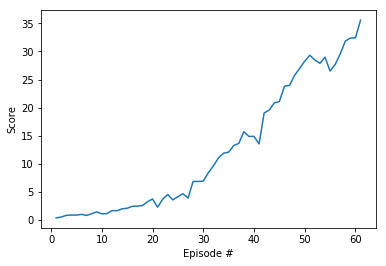

In [4]:

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Run trained model



In [5]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0, filenameActor='checkpoint_actor.pth', filenameCritic='checkpoint_critic.pth')
scores = ddpg(n_episodes=100,train=False)

Episode 9	Average Score: 34.08	Mean current: 35.60
Environment solved in -91 episodes!	Average Score: 34.08


When finished, you can close the environment.

In [6]:
env.close()